# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 13.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
255052,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0781,0.2148,0.0024,0.1880,0,0,0,0
205054,0.0024,0.0024,0.0024,0.0024,0.0024,0.0610,0.1929,0.1343,0.0024,0.3223,0,0,0,0
35944,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.8813,0.1440,0.0024,0.3027,3,0,5,0
23484,0.0830,0.0024,0.0024,0.0024,0.0024,0.0928,1.5698,0.2344,0.0024,0.2759,0,0,0,0
430249,0.4199,0.7690,0.5615,0.2173,0.0122,0.1660,2.6221,0.8911,0.4175,0.2734,3,3,21,21


In [3]:
raw_data.shape

(456617, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456617 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456617 non-null  float64
 1   Emg2          456617 non-null  float64
 2   Emg3          456617 non-null  float64
 3   Emg4          456617 non-null  float64
 4   Emg5          456617 non-null  float64
 5   Emg6          456617 non-null  float64
 6   Emg7          456617 non-null  float64
 7   Emg8          456617 non-null  float64
 8   Emg9          456617 non-null  float64
 9   Emg10         456617 non-null  float64
 10  repetition    456617 non-null  int64  
 11  rerepetition  456617 non-null  int64  
 12  stimulus      456617 non-null  int64  
 13  restimulus    456617 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456617.000000,456617.00000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000
mean,0.087577,0.11154,0.061346,0.020098,0.008846,0.090938,0.618475,0.313635,0.056314,0.273335,3.228675,2.073085,5.721548,3.711012
std,0.175377,0.27810,0.259189,0.122684,0.026813,0.155394,0.947964,0.324967,0.237637,0.115594,3.489333,3.210448,6.595727,6.071876
min,0.000000,0.00000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.065900,0.131800,0.002400,0.212400,0.000000,0.000000,0.000000,0.000000
50%,0.024400,0.00240,0.002400,0.002400,0.002400,0.031700,0.156300,0.200200,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.095200,0.00980,0.004900,0.002400,0.002400,0.122100,0.798300,0.373500,0.002400,0.297900,6.000000,4.000000,10.000000,6.000000
max,4.668000,4.66550,4.663100,4.521500,1.843300,3.176300,4.668000,4.668000,4.665500,3.840300,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188571
8      15509
4      15506
12     15496
7      15495
2      15486
5      15477
11     15468
6      15464
9      15445
10     15440
3      15435
1      15424
13     10332
14     10327
17     10323
15     10294
16     10251
18      5162
19      5162
21      5161
22      5135
23      5128
20      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

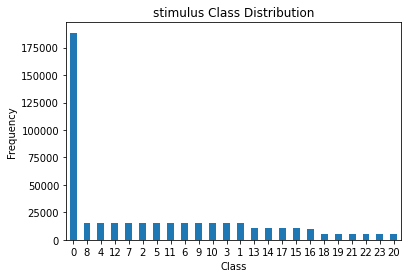

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
310185,0.0781,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.3760,0.0024,0.2075,0,0,0,0
42623,0.0024,0.0732,0.1660,0.0024,0.0024,0.0488,1.0669,0.1294,0.1709,0.2734,1,1,6,6
246838,0.1294,0.8936,0.0391,0.0049,0.0073,0.1245,2.9175,0.7007,0.0439,0.2637,4,4,1,1
392564,0.0146,0.0024,0.0293,0.0024,0.0024,0.1270,0.1367,0.2783,0.0024,0.2490,1,1,17,17
365026,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0513,0.0024,0.1709,0,0,0,0


In [12]:
raw_data.shape

(354555, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354555 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          354555 non-null  float64
 1   Emg2          354555 non-null  float64
 2   Emg3          354555 non-null  float64
 3   Emg4          354555 non-null  float64
 4   Emg5          354555 non-null  float64
 5   Emg6          354555 non-null  float64
 6   Emg7          354555 non-null  float64
 7   Emg8          354555 non-null  float64
 8   Emg9          354555 non-null  float64
 9   Emg10         354555 non-null  float64
 10  repetition    354555 non-null  int64  
 11  rerepetition  354555 non-null  int64  
 12  stimulus      354555 non-null  int64  
 13  restimulus    354555 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 40.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 84.99104511288799


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     37418
           1       0.81      0.82      0.81      1916
           2       0.80      0.82      0.81      1886
           3       0.79      0.79      0.79      2108
           4       0.77      0.77      0.77      1874
           5       0.74      0.74      0.74      1961
           6       0.79      0.79      0.79      2156
           7       0.77      0.76      0.77      1759
           8       0.74      0.75      0.74      1869
           9       0.67      0.68      0.68      1913
          10       0.73      0.74      0.73      1640
          11       0.79      0.77      0.78      1823
          12       0.77      0.75      0.76      1741
          13       0.80      0.80      0.80      1065
          14       0.60      0.62      0.61      1401
          15       0.67      0.68      0.67      1412
          16       0.69      0.72      0.71      1256
 

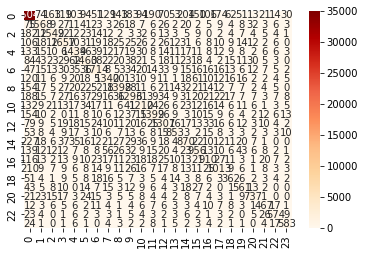

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.2209953321769542
MSE: 14.329286006402391
RMSE: 3.785404338561786


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8503395967850074
Recall Score :  0.8499104511288799
f1_score :  0.8500721289882552


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 89.52912806193679


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     37418
           1       0.90      0.87      0.88      1916
           2       0.85      0.86      0.85      1886
           3       0.86      0.83      0.85      2108
           4       0.87      0.85      0.86      1874
           5       0.83      0.83      0.83      1961
           6       0.89      0.87      0.88      2156
           7       0.82      0.80      0.81      1759
           8       0.81      0.81      0.81      1869
           9       0.82      0.79      0.80      1913
          10       0.84      0.81      0.82      1640
          11       0.87      0.85      0.86      1823
          12       0.89      0.87      0.88      1741
          13       0.90      0.88      0.89      1065
          14       0.67      0.68      0.67      1401
          15       0.72      0.71      0.72      1412
          16       0.84      0.83      0.83      1256
 

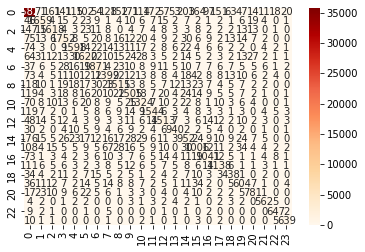

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.879849388670305
MSE: 10.454922367474722
RMSE: 3.233407238111946


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8945605493959959
Recall Score :  0.8952912806193679
f1_score :  0.8948144936251701


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.37071822425294


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     37418
           1       0.96      0.90      0.93      1916
           2       0.94      0.86      0.90      1886
           3       0.92      0.88      0.90      2108
           4       0.93      0.86      0.89      1874
           5       0.91      0.87      0.89      1961
           6       0.94      0.91      0.92      2156
           7       0.92      0.82      0.87      1759
           8       0.93      0.84      0.88      1869
           9       0.88      0.81      0.84      1913
          10       0.90      0.83      0.86      1640
          11       0.95      0.83      0.89      1823
          12       0.94      0.88      0.91      1741
          13       0.95      0.87      0.90      1065
          14       0.79      0.72      0.75      1401
          15       0.80      0.81      0.81      1412
          16       0.92      0.80      0.86      1256
 

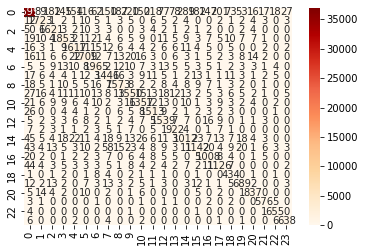

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6639731494408484
MSE: 8.079973487893275
RMSE: 2.8425294172432545


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9234889186288425
Recall Score :  0.9237071822425293
f1_score :  0.9223200890814239


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[20:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 91.78547757047568


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     37418
           1       0.94      0.90      0.92      1916
           2       0.91      0.88      0.89      1886
           3       0.90      0.87      0.88      2108
           4       0.91      0.87      0.89      1874
           5       0.90      0.85      0.88      1961
           6       0.92      0.90      0.91      2156
           7       0.88      0.84      0.86      1759
           8       0.87      0.85      0.86      1869
           9       0.84      0.80      0.82      1913
          10       0.86      0.83      0.84      1640
          11       0.91      0.84      0.87      1823
          12       0.91      0.88      0.89      1741
          13       0.91      0.87      0.89      1065
          14       0.75      0.73      0.74      1401
          15       0.81      0.78      0.80      1412
          16       0.90      0.81      0.85      1256
 

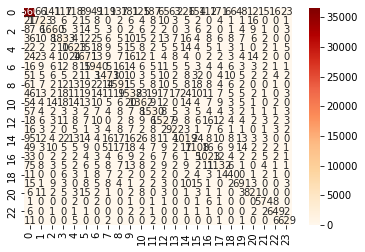

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6942787437774112
MSE: 8.289179393888114
RMSE: 2.879093502109321


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9168130801563069
Recall Score :  0.9178547757047567
f1_score :  0.9168693688973245


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 92.42430652508074


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37418
           1       0.97      0.90      0.93      1916
           2       0.96      0.87      0.91      1886
           3       0.92      0.87      0.90      2108
           4       0.94      0.87      0.90      1874
           5       0.92      0.87      0.90      1961
           6       0.95      0.92      0.93      2156
           7       0.92      0.83      0.87      1759
           8       0.93      0.84      0.88      1869
           9       0.89      0.81      0.85      1913
          10       0.93      0.83      0.88      1640
          11       0.96      0.82      0.89      1823
          12       0.95      0.89      0.92      1741
          13       0.96      0.88      0.92      1065
          14       0.80      0.70      0.75      1401
          15       0.83      0.79      0.81      1412
          16       0.93      0.81      0.87      1256
 

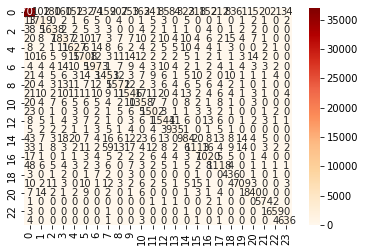

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6793727348366262
MSE: 8.372480997306482
RMSE: 2.8935239755886735


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9244062837877073
Recall Score :  0.9242430652508073
f1_score :  0.922746679636377
